In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.filters as sm
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15

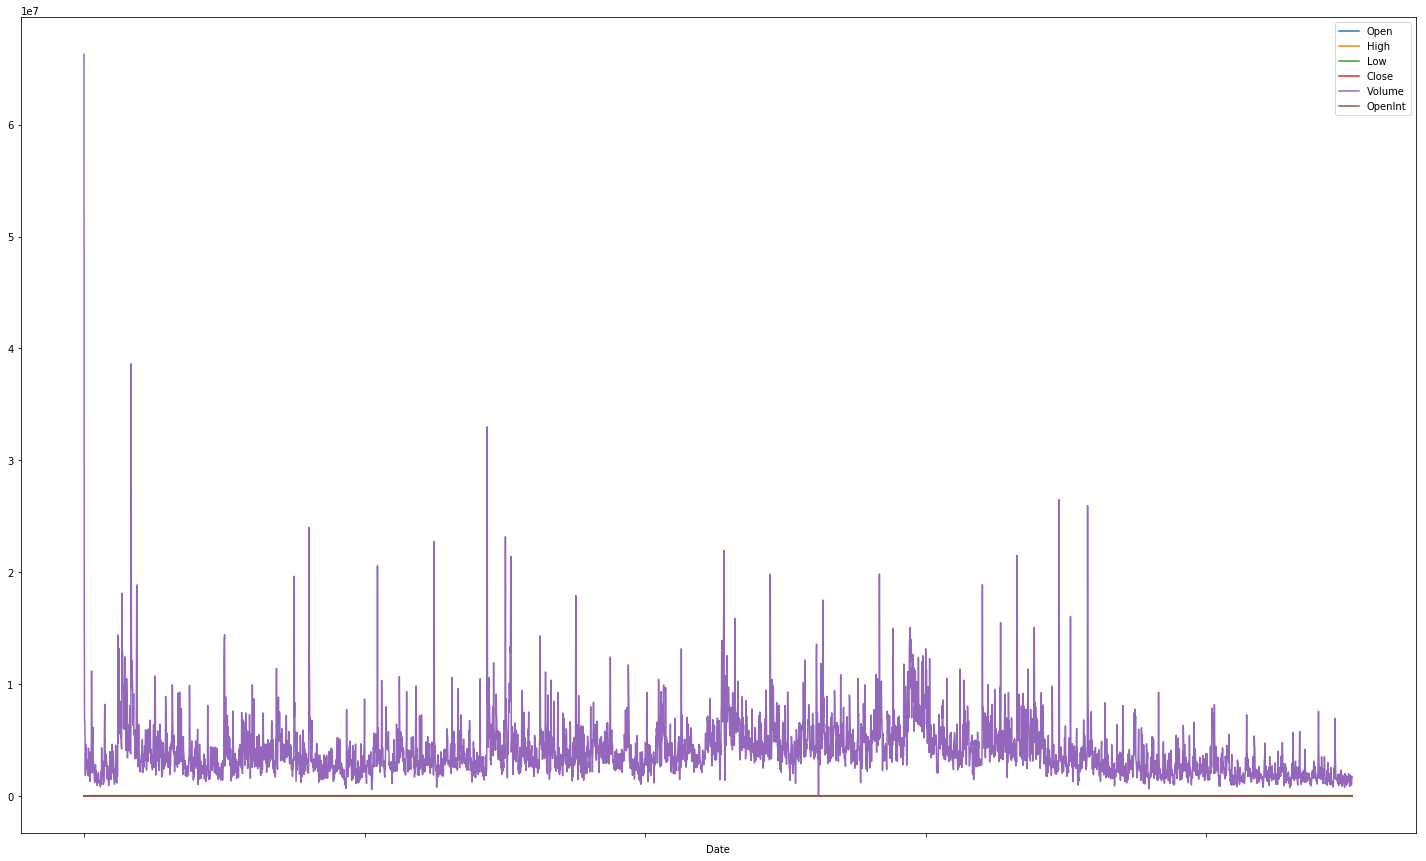

In [3]:
data = pd.read_csv("Stocks/a.us.txt")
data.set_index("Date", inplace=True)
data.plot()
plt.show()

In [4]:
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1999-11-19,28.986,29.027,26.872,27.257,16142920,0
1999-11-22,27.886,29.702,27.044,29.702,6970266,0
1999-11-23,28.688,29.446,27.002,27.002,6332082,0
1999-11-24,27.083,28.309,27.002,27.717,5132147,0


In [5]:
from statsmodels.tsa.stattools import kpss
def kpss_test(X):
	# Test for Stationarity
	result = kpss(X, regression = 'ct')
	output = {}

	output["KPSS Statistics"] = result[0]
	output["p value"] = result[1]
	output["Number of Lags Used"] = result[2]
	output["Critical values"] = result[3]

	return output

result = kpss_test(data["2016":"2017"].Close)
print(result)

{'KPSS Statistics': 0.3276823126945599, 'p value': 0.01, 'Number of Lags Used': 16, 'Critical values': {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}}


/home/crater/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [6]:
print("ADF Statistics: %.8f"%result[0])
print("p value: %.8f"%result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

KeyError: 0

In [7]:
print(result)

{'KPSS Statistics': 0.3276823126945599, 'p value': 0.01, 'Number of Lags Used': 16, 'Critical values': {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}}


In [8]:
import matplotlib.pyplot as plt
def plot_result(result, show = True):
    fig, ax = plt.subplots()
    result.plot(ax=ax, style=['r--', 'b-'])
    if show:
        plt.show()

In [11]:
# Braxton King
from statsmodels.tsa.filters.bk_filter import bkfilter

result_bk = bkfilter(data["2016":].Close.values, low = 10, high = 100, K = 20)
# plt.title("Braxter King Filter: Agilent Technologies Inc")
plot_result(pd.DataFrame(result_bk), title = "Braxter King Filter: Agilent Technologies Inc")

TypeError: plot_result() got an unexpected keyword argument 'title'

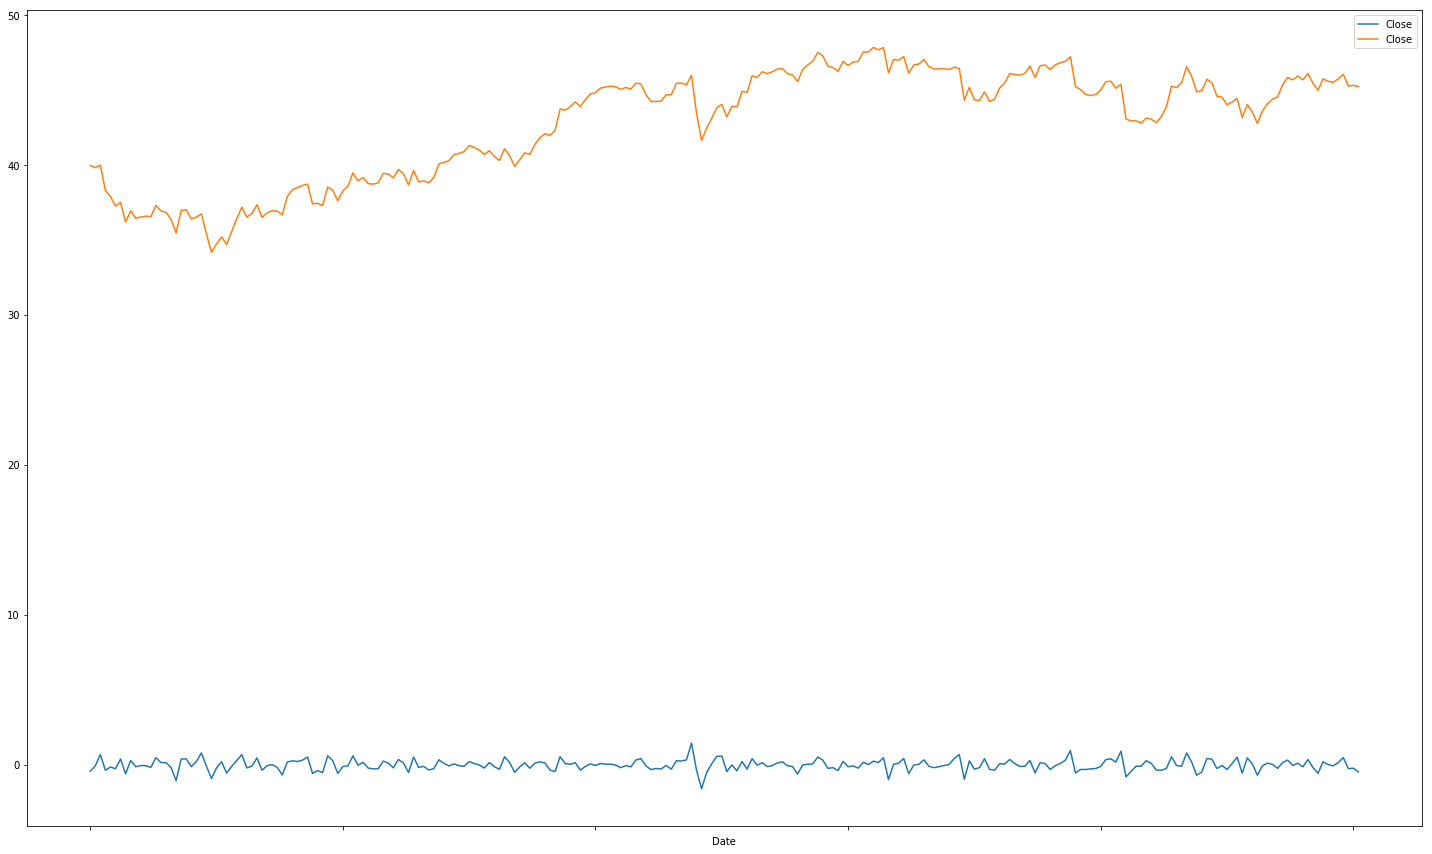

In [13]:
import statsmodels.api as sm

cycle, trend = sm.tsa.filters.hpfilter(data.Close,5)
pd.concat([cycle, data.Close],axis = 1)["2016":"2017"].plot()
plt.show()

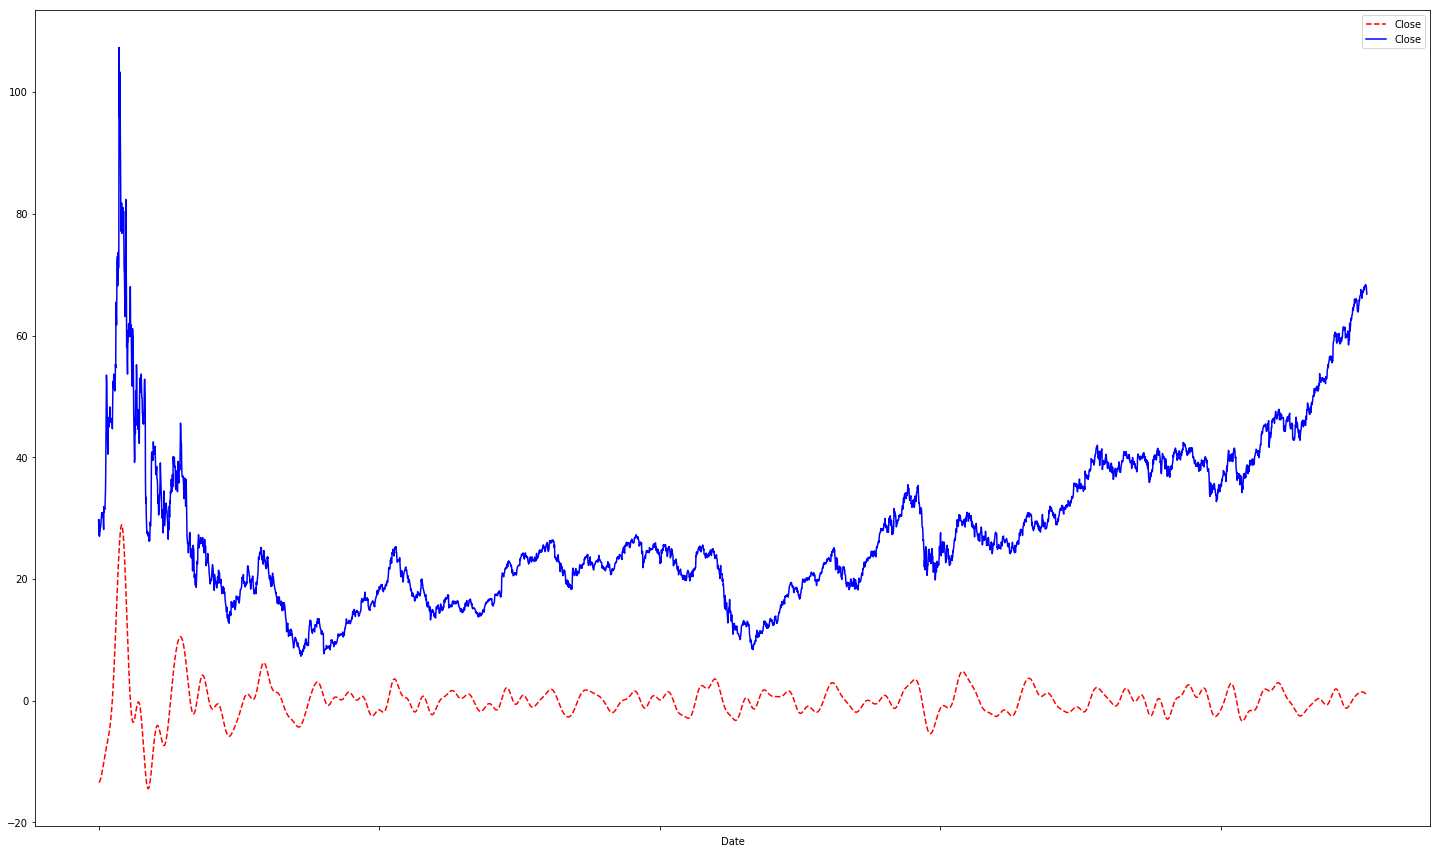

In [14]:
import statsmodels
results_cf = statsmodels.tsa.filters.cf_filter.cffilter(data.Close, low = 50, high=300, drift = True)
cycles, trend = results_cf
plot_result(pd.concat([cycles, data.Close], axis = 1), show = False)
plt.show()

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests

temp_data = pd.read_csv("Stocks/googl.us.txt")
temp_data.set_index("Date", inplace = True)

temp_data2 = pd.read_csv("Stocks/xrx.us.txt")
temp_data2.set_index("Date", inplace = True)


In [16]:
print(temp_data.describe())
print(temp_data2.describe())

              Open         High          Low        Close        Volume  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3.333000e+03   
mean    389.993375   393.377354   386.213266   389.855821  7.951734e+06   
std     235.104757   236.348229   233.616339   235.102374  8.327410e+06   
min      49.595000    50.870000    47.980000    50.005000  0.000000e+00   
25%     228.730000   230.930000   226.170000   228.510000  2.535424e+06   
50%     295.980000   298.190000   293.350000   295.610000  5.201600e+06   
75%     550.370000   554.780000   545.500000   549.490000  1.047400e+07   
max    1050.050000  1063.620000  1047.050000  1058.290000  8.223340e+07   

       OpenInt  
count   3333.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
               Open          High           Low         Close        Volume  \
count  10307.000000  10307.000000  10307.000000  10307.000000  1.030700e+04   
mean      45.

In [17]:
x1 = temp_data["2016":"2017"]
x2 = temp_data2["2016": "2017"]

In [18]:
print(x1.head())
print(x2.head())

              Open    High     Low   Close   Volume  OpenInt
Date                                                        
2016-01-04  762.20  762.20  747.54  759.44  3136370        0
2016-01-05  764.10  769.20  755.65  761.53  1593922        0
2016-01-06  750.37  765.73  748.00  759.33  1669043        0
2016-01-07  746.49  755.31  735.28  741.00  2398365        0
2016-01-08  747.80  750.12  728.92  730.91  2140062        0
              Open    High     Low   Close   Volume  OpenInt
Date                                                        
2016-01-04  39.343  39.418  38.284  38.930  2413707        0
2016-01-05  38.930  39.343  38.666  38.851  1715125        0
2016-01-06  38.284  38.516  37.907  38.359  1830377        0
2016-01-07  37.607  37.721  37.038  37.302  2822192        0
2016-01-08  37.568  37.757  36.057  36.244  3139680        0


In [19]:
data_granger = pd.concat([x1.Close, x2.Close], axis = 1)
data_granger.columns = ["Google", "Xerox"]

In [20]:
data_granger.head()

,Google,Xerox
Date,,
2016-01-04,759.44,38.930
2016-01-05,761.53,38.851
2016-01-06,759.33,38.359
2016-01-07,741.00,37.302
2016-01-08,730.91,36.244


In [21]:
result_granger = grangercausalitytests(data_granger, maxlag=15, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1354  , p=0.7132  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.1370  , p=0.7113  , df=1
likelihood ratio test: chi2=0.1370  , p=0.7113  , df=1
parameter F test:         F=0.1354  , p=0.7132  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1124  , p=0.8938  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=0.2293  , p=0.8917  , df=2
likelihood ratio test: chi2=0.2292  , p=0.8917  , df=2
parameter F test:         F=0.1124  , p=0.8938  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2390  , p=0.8691  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=0.7376  , p=0.8643  , df=3
likelihood ratio test: chi2=0.7365  , p=0.8646  , df=3
parameter F test:         F=0.2390  , p=0.8691  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4273  , p=0.7888  

In [120]:
result_granger

{1: ({'lrtest': (-4.547473508864641e-13, 1.0, 1),
   'params_ftest': (3654.5452074597524, 8.0862307157223e-151, 249.0, 1.0),
   'ssr_chi2test': (-3.2614087718489753e-13, 1.0, 1),
   'ssr_ftest': (-3.2354214509577487e-13, 1.0, 249.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (-2.2737367544323206e-13, 1.0, 2),
   'params_ftest': (1813.6182071315468, 2.275558781322505e-148, 247.0, 2.0),
   'ssr_chi2test': (-2.437618113168993e-13, 1.0, 2),
   'ssr_ftest': (-1.2041833479054825e-13, 1.0, 247.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (-0.0, 1.0, 3),
   'params_ftest': (1212.030326280548, 1.2876855480450221e-146, 245.0, 3.0),
   'ssr_chi2test': (-1.6347496877129066e-13, 1.0, 3),
   'ssr_ftest': (-5.3616288285095337e-14, 1.0, 245.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])]),
 4: ({'lrtest': (4.547473508864641e-13, 1.0, 4),
   'params_ftest': (929.7821535

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def exp_smoothing(data):
	model = ExponentialSmoothing(data, trend = "additive").fit(smoothing_level=0.1,optimized=True)
	result = model.fittedvalues
	return pd.DataFrame(result)

/home/crater/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


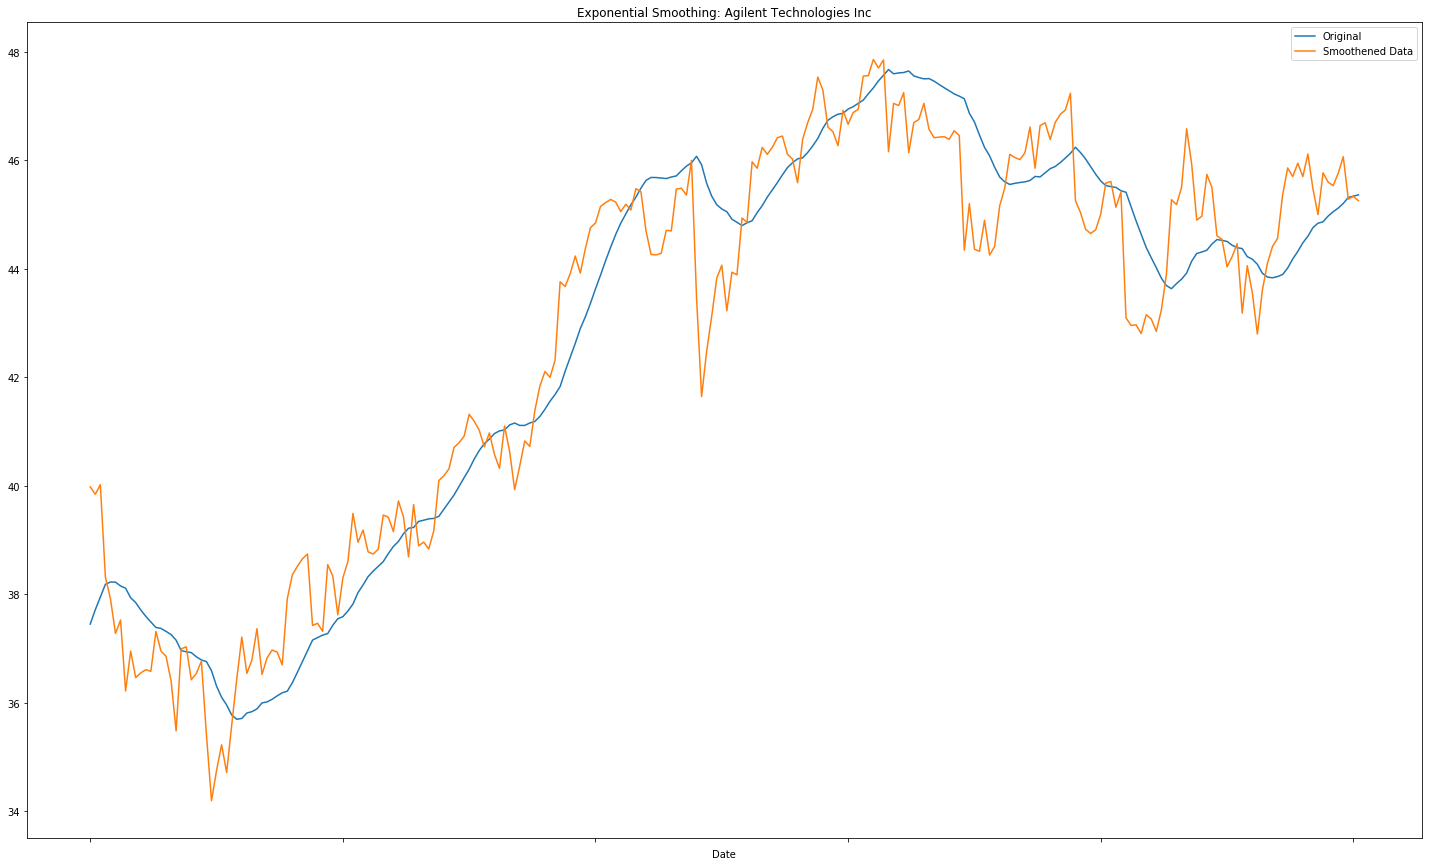

In [20]:
result = pd.concat([exp_smoothing(data.Close["2016":"2017"]), data.Close["2016":"2017"]], axis = 1)
result.columns = ["Original", "Smoothened Data"]
result.plot()
plt.title("Exponential Smoothing: Agilent Technologies Inc")
plt.show()

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def simple_exp_smoothing(data):
	model = SimpleExpSmoothing(data).fit(smoothing_level = 0.1, optimized = True)
	result = model.fittedvalues
	return pd.DataFrame(result)

/home/crater/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


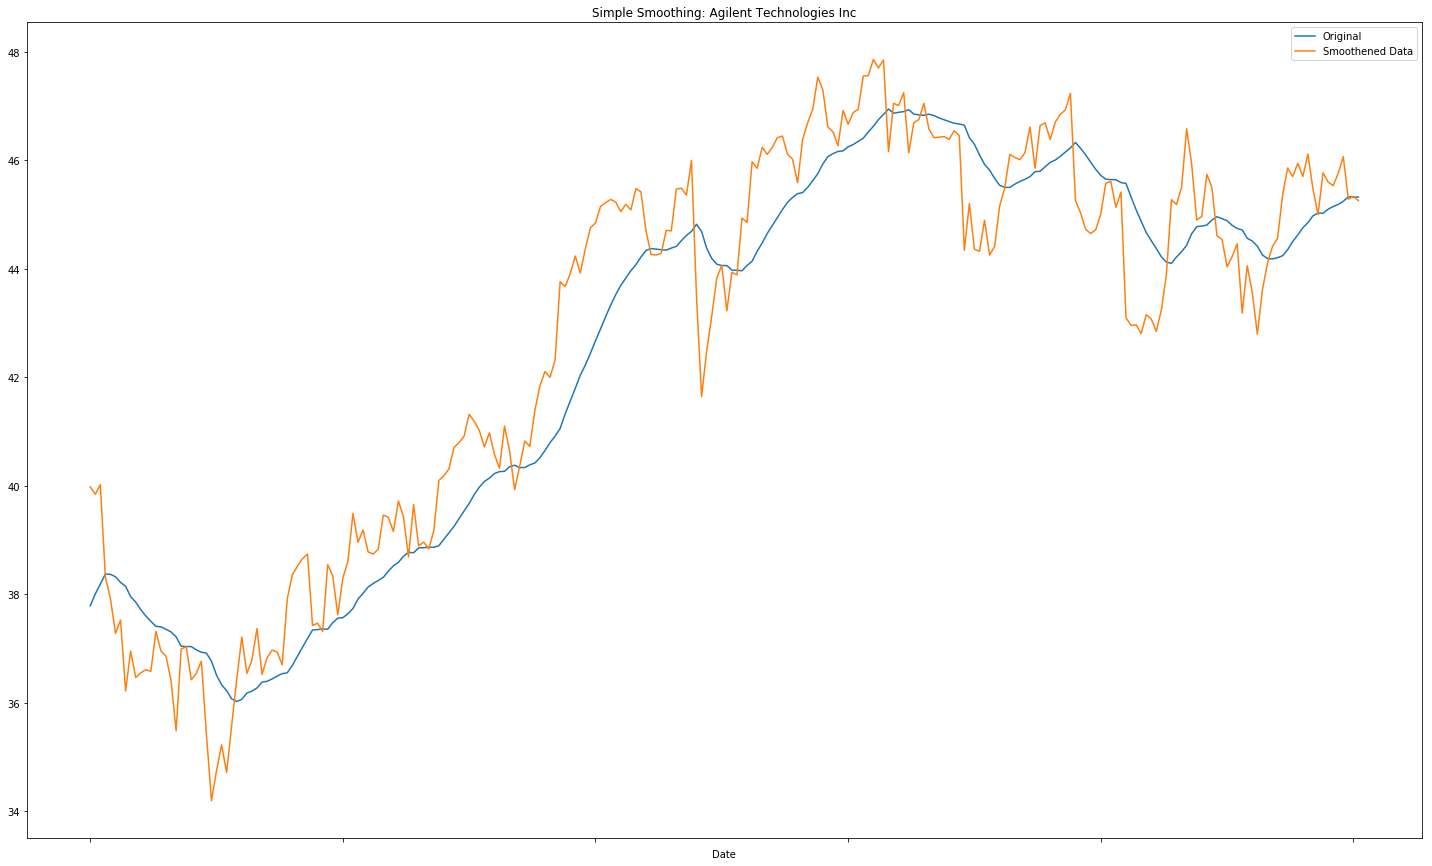

In [21]:
result = pd.concat([simple_exp_smoothing(data.Close["2016":"2017"]), data.Close["2016":"2017"]], axis = 1)
result.columns = ["Original", "Smoothened Data"]
result.plot()
plt.title("Simple Smoothing: Agilent Technologies Inc")
plt.show()

In [16]:
def moving_average(data, window = 8):
	rolling = data.rolling(window = window)
	result = rolling.mean()
	return pd.DataFrame(result)

In [17]:
import math
def rmse(data1, data2):
	return math.sqrt(sum((np.array(data1.values) - np.array(data2.values))**2)/len(data1))

In [18]:
rmse(pd.DataFrame([1,2]), pd.DataFrame([3,5]))

2.5495097567963922